In [9]:
pip install scikit-learn-extra

In [10]:
'''
@author=='shyamgupta196
python version used==3.8.3
'''

"\n@author=='shyamgupta196\npython version used==3.8.3\n"

### the motivation behind the study is to know how people are facing heart problems 

###### in this we are interested in knowing what is can be the relation of the rising cholestrol level with different features of the data  

In [11]:
from sklearn_extra.cluster import KMedoids 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df = pd.read_csv('heart.csv')

#### we check for the values of the serum cholestoral in mg/dl
 ### ('chol') column


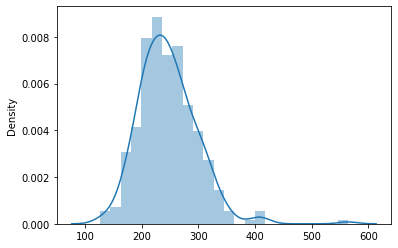

In [67]:
sns.distplot(df[['chol']])

##### as we can see that although the values are distributed uniformly the data is having the distribution over a long range of values 

##### therefore we use standard scalar to scale the values of the data

In [68]:
df['chol'] = StandardScaler().fit_transform(df['chol'].values.reshape(-1,1))

In [15]:
# df = pd.DataFrame(scale,columns=df.columns)

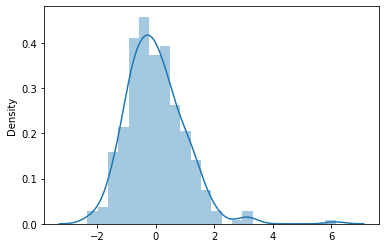

In [69]:
sns.distplot(df[['chol']])

###### finding the best value for no of clusters in the 'chol' column

In [70]:
inertias = []
for i in range(1,10):
  km = KMedoids(i)
  preds = km.fit(df[['chol']])
  inertias.append(km.inertia_)


#### using elbow method to find the number of clusters with least SSE

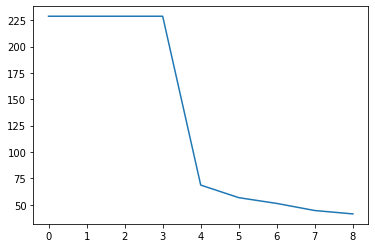

In [71]:
plt.plot(inertias)

### looks like 5 is value of clusters we were looking at so lets use that


In [75]:
km = KMedoids(5).fit(df[['chol']])

In [76]:
x=df[['chol']]

preds = km.predict(x)
print(preds)
df['predictions_chol'] = preds
# df.set_index('predictions_thalach',inplace=True)

[2 3 0 3 4 0 4 1 0 0 3 1 1 2 1 2 4 2 3 3 2 2 2 3 0 4 2 0 4 0 0 0 2 1 2 0 4
 2 1 4 4 3 0 1 4 4 2 3 2 2 3 4 2 0 3 0 2 1 0 4 1 4 0 0 2 0 2 2 2 0 3 2 0 1
 2 3 3 2 0 3 3 4 4 4 1 4 1 0 2 3 3 0 2 1 0 2 4 2 4 3 3 1 0 3 0 2 2 3 3 3 4
 0 4 2 1 2 2 0 0 3 4 1 1 1 0 0 0 1 0 1 0 1 4 2 4 1 0 0 0 1 4 4 0 2 0 3 3 3
 2 0 2 0 2 1 2 0 3 0 2 2 3 4 0 0 0 1 2 1 3 0 3 2 1 2 0 0 2 4 0 1 4 2 4 2 3
 1 3 1 2 0 4 2 0 1 0 4 2 3 1 3 0 3 1 1 0 3 3 3 0 0 2 1 2 4 3 4 1 4 3 3 4 2
 1 1 3 0 1 0 1 4 3 1 1 3 4 4 4 4 4 1 1 3 2 1 0 1 4 3 1 3 4 3 4 4 1 4 1 0 3
 2 2 2 1 1 0 2 4 0 1 1 3 2 3 2 1 2 2 1 4 0 4 0 2 2 0 4 0 2 4 0 0 4 2 2 0 0
 0 0 3 1 0 0 3]


In [77]:
center = km.cluster_centers_
print(center)

[[-0.95205107]
 [ 0.47803462]
 [-0.41093757]
 [-0.00510244]
 [ 1.28970488]]


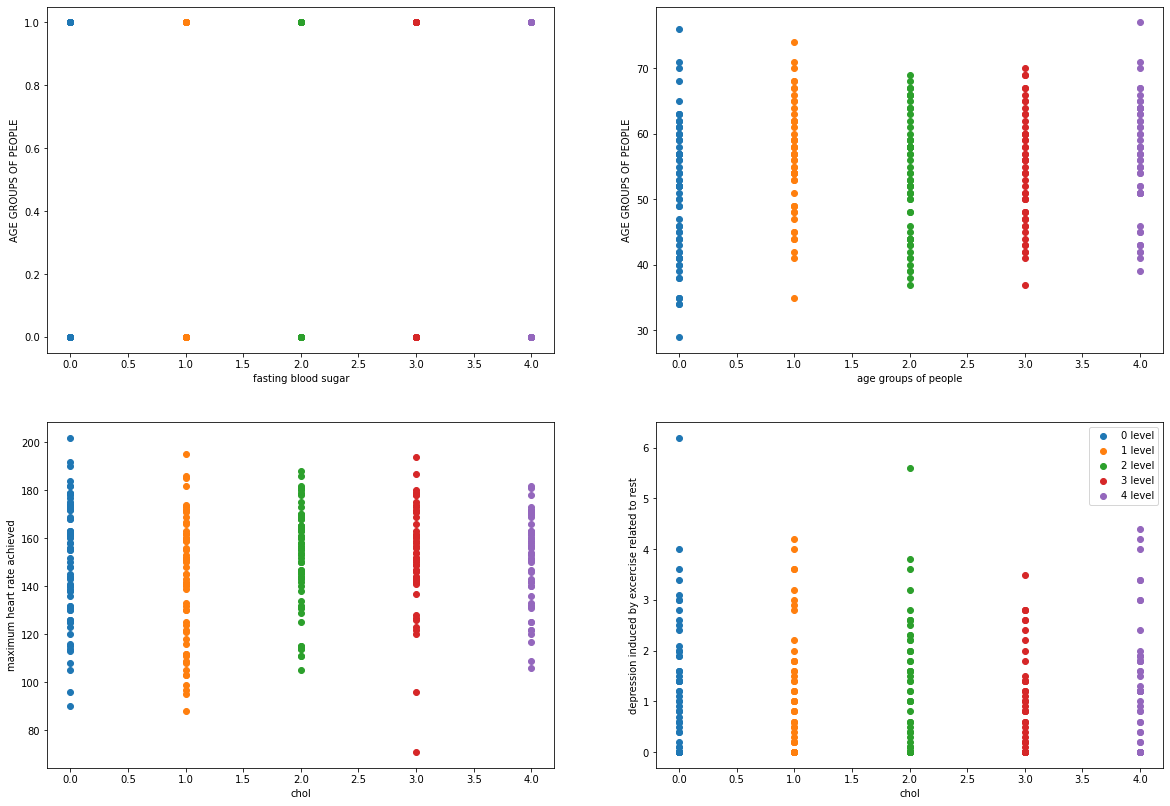

In [97]:
df5 = df[df.predictions_chol==4]
df4 = df[df.predictions_chol==3]
df3 = df[df.predictions_chol==2]
df2 = df[df.predictions_chol==1]
df1 = df[df.predictions_chol==0]

# plt.plot(center[0][0],marker='*',color='black',label='cluster centers')
# plt.plot(center[1][0],marker='*',color='black')
# plt.plot(center[2][0],marker='*',color='black')
# plt.plot(center[3][0],marker='*',color='black')
# plt.plot(center[4][0],marker='*',color='black')


# since the cluster values are very low n 1-D data so we cannot use them for plotting

fig = plt.figure(figsize=(20,14))

ax1 =  fig.add_subplot(221)
plt.scatter(x=df1.predictions_chol,y=df1.fbs,label='0 level',)
plt.scatter(x=df2.predictions_chol,y=df2.fbs,label='1 level')
plt.scatter(x=df3.predictions_chol,y=df3.fbs,label='2 level')
plt.scatter(x=df4.predictions_chol,y=df4.fbs,label='3 level')
plt.scatter(x=df5.predictions_chol,y=df5.fbs,label='4 level')
plt.xlabel('fasting blood sugar')
plt.ylabel('AGE GROUPS OF PEOPLE')

ax2 = fig.add_subplot(222)

plt.scatter(x=df1.predictions_chol,y=df1.age,label='0 level',)
plt.scatter(x=df2.predictions_chol,y=df2.age,label='1 level')
plt.scatter(x=df3.predictions_chol,y=df3.age,label='2 level')
plt.scatter(x=df4.predictions_chol,y=df4.age,label='3 level')
plt.scatter(x=df5.predictions_chol,y=df5.age,label='4 level')
plt.xlabel('age groups of people')
plt.ylabel('AGE GROUPS OF PEOPLE')

ax3 = fig.add_subplot(223)

plt.scatter(x=df1.predictions_chol,y=df1.thalach,label='0 level',)
plt.scatter(x=df2.predictions_chol,y=df2.thalach,label='1 level')
plt.scatter(x=df3.predictions_chol,y=df3.thalach,label='2 level')
plt.scatter(x=df4.predictions_chol,y=df4.thalach,label='3 level')
plt.scatter(x=df5.predictions_chol,y=df5.thalach,label='4 level')
plt.xlabel('chol')
plt.ylabel('maximum heart rate achieved')

ax4 = fig.add_subplot(224)

plt.scatter(x=df1.predictions_chol,y=df1.oldpeak,label='0 level',)
plt.scatter(x=df2.predictions_chol,y=df2.oldpeak,label='1 level')
plt.scatter(x=df3.predictions_chol,y=df3.oldpeak,label='2 level')
plt.scatter(x=df4.predictions_chol,y=df4.oldpeak,label='3 level')
plt.scatter(x=df5.predictions_chol,y=df5.oldpeak,label='4 level')
plt.xlabel('chol')
plt.ylabel('depression induced by excercise related to rest')


plt.legend()
plt.show()

### due to lack of domain knowledge we do not know what levels are having what risk factor associated with it 
##### but one thing that can be seen clearly is the seperation of people n done correctly and they are placed correctly in respective clusters 
##### this can be validated by seeing its relation with different columns


### thank you 
